# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

# Functions 

In [2]:
def plot_3d_clusters(data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    cmap=plt.cm.get_cmap("Accent_r")
    
    cont=0
    for label,dataset in data.groupby("label"):
        x = []
        y = []
        z = []
        for data_point in dataset.values:
            x.append(data_point[0])
            y.append(data_point[1])
            z.append(data_point[2])
        ax.scatter(x, y, z, marker='o',label="cluster "+str(cont))
        cont=cont+1

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.legend()
    
    return fig

# Load dataset and set global variables

In [25]:
classes_dataset = pd.read_csv("class.csv")
zoo_dataset = pd.read_csv("zoo.csv", index_col = 0)
zoo_dataset_labels = zoo_dataset["class_type"]
zoo_dataset = zoo_dataset.drop(["class_type"], axis = 1)
zoo_dataset.head(10)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
animal_name,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0


In [4]:
zoo_dataset.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000


In [5]:
zoo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, aardvark to wren
Data columns (total 16 columns):
hair        101 non-null int64
feathers    101 non-null int64
eggs        101 non-null int64
milk        101 non-null int64
airborne    101 non-null int64
aquatic     101 non-null int64
predator    101 non-null int64
toothed     101 non-null int64
backbone    101 non-null int64
breathes    101 non-null int64
venomous    101 non-null int64
fins        101 non-null int64
legs        101 non-null int64
tail        101 non-null int64
domestic    101 non-null int64
catsize     101 non-null int64
dtypes: int64(16)
memory usage: 13.0+ KB


# Pre-process

In [6]:
normalized_zoo_data = MinMaxScaler( copy = False).fit_transform(zoo_dataset)
normalized_zoo_dataset = pd.DataFrame(data = normalized_zoo_data, columns = zoo_dataset.columns)

c:\users\jadson\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [7]:
normalized_zoo_dataset.head(10)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,1.0,1.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,1.0,0.0


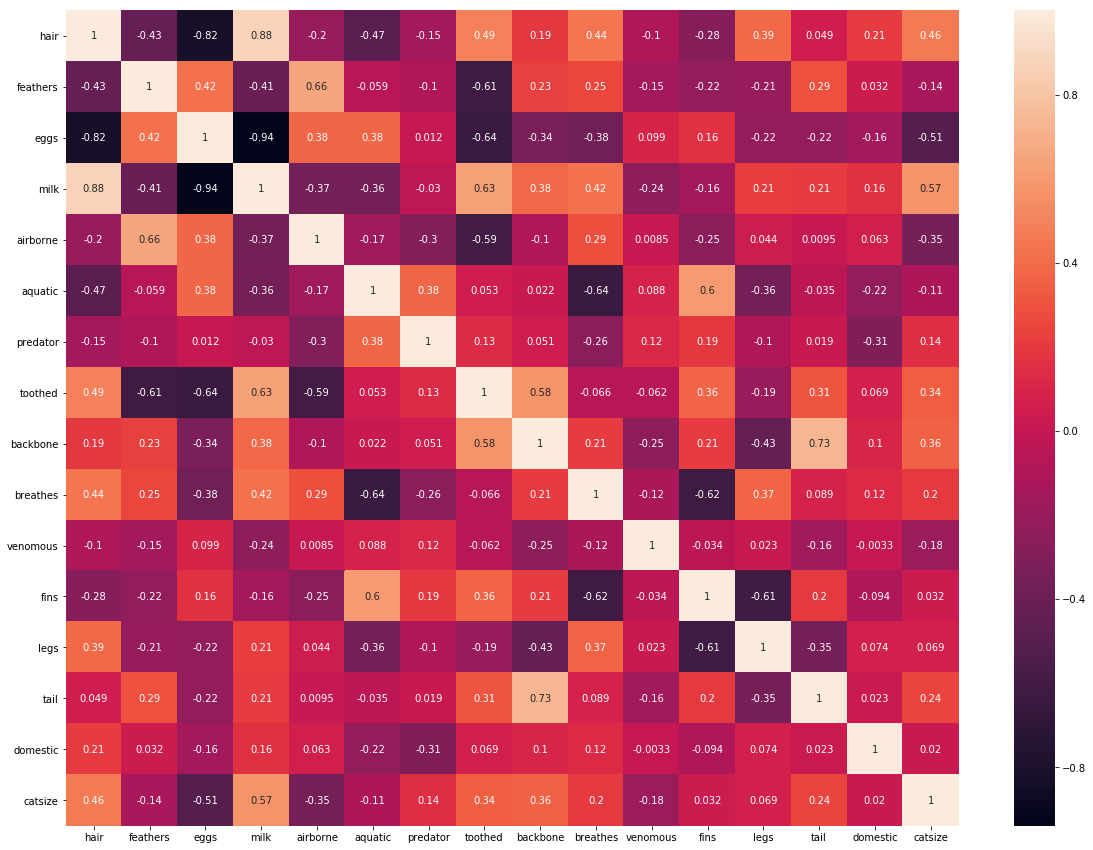

In [8]:
plt.subplots(figsize=(20,15))
snb.heatmap(data = normalized_zoo_dataset.corr(), annot = True)

# Find best features with random forest 

In [32]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(normalized_zoo_dataset, zoo_dataset_labels)
random_forest_model.feature_importances_

c:\users\jadson\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([1.15394697e-01, 1.08639815e-01, 8.14815153e-02, 1.43887688e-01,
       2.93266599e-02, 3.36448857e-02, 1.72369436e-02, 9.15046310e-02,
       4.32931462e-02, 8.17930064e-02, 1.16884342e-02, 4.38987832e-02,
       1.33820167e-01, 4.34025641e-02, 2.47047401e-05, 2.09623583e-02])

# Kmeans and PCA

In [42]:
kmeans_model = KMeans(n_clusters = 7)
kmeans_model.fit(normalized_zoo_dataset)

centroids_dataset = pd.DataFrame(data = kmeans_model.cluster_centers_, columns = zoo_dataset.columns).round(4)
centroids_dataset

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,-0.0000,0.0,0.9286,-0.0,-0.0000,1.0000,0.7143,1.0000,1.0000,0.0,0.1429,0.9286,0.0000,1.0000,0.0714,0.2857
1,0.0000,0.0,0.8889,0.0,-0.0000,0.4444,0.7778,0.7778,0.8889,1.0,0.3333,0.0000,0.4444,0.6667,0.0000,0.1111
2,0.9091,-0.0,0.0455,1.0,-0.0000,0.2727,1.0000,0.9545,1.0000,1.0,-0.0000,0.1818,0.4091,0.8182,0.0909,0.9091
3,-0.0000,1.0,1.0000,-0.0,0.8000,0.3000,0.4500,0.0000,1.0000,1.0,-0.0000,-0.0000,0.2500,1.0000,0.1500,0.3000
4,0.4000,0.0,1.0000,0.0,0.6000,0.0000,0.1000,0.0000,-0.0000,1.0,0.2000,0.0000,0.6000,0.0000,0.1000,-0.0000
5,0.0000,0.0,1.0000,0.0,0.0000,0.8571,1.0000,0.0000,0.0000,0.0,0.1429,0.0000,0.5179,0.0000,0.0000,0.1429
6,1.0000,-0.0,0.0000,1.0,0.1053,-0.0000,-0.0000,1.0000,1.0000,1.0,-0.0000,-0.0000,0.4342,0.8947,0.3158,0.6316


In [34]:
pca_model = PCA(n_components = 3)
pca_components_data = pca_model.fit_transform(zoo_dataset)
pca_wine_dataset = pd.DataFrame(data = pca_components_data, columns = ["Component "+str(cont) for cont in range(pca_components_data.shape[1])])
pca_wine_dataset["label"] = kmeans_model.labels_
pca_wine_dataset.head()

,Component 0,Component 1,Component 2,label
0,1.351029,-1.058533,0.314103,6
1,1.306634,-1.208344,-0.289405,1
2,-3.131655,0.252200,0.929419,0
3,1.351029,-1.058533,0.314103,6
4,1.277296,-1.225750,0.126239,6


<IPython.core.display.Javascript object>


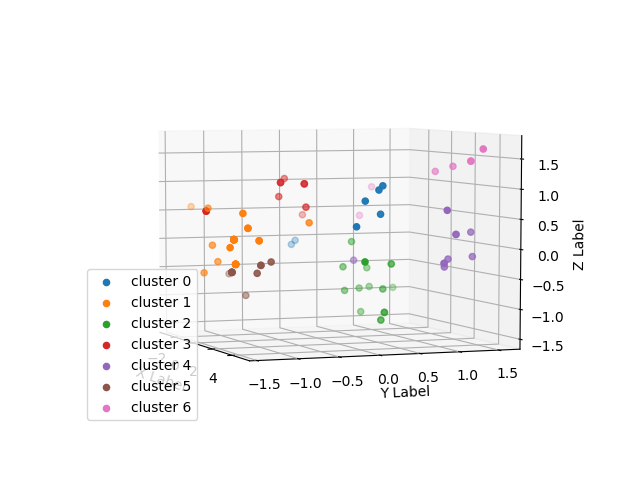

In [24]:
%matplotlib notebook
fig = plot_3d_clusters(pca_wine_dataset)

In [44]:
random_forest_model.predict(centroids_dataset)

array([4, 3, 1, 2, 6, 7, 1], dtype=int64)

In [45]:
get_class_type = lambda class_number : classes_dataset[classes_dataset["Class_Number"] == class_number]["Class_Type"].values[0]
centroids_dataset["classe"] = [get_class_type(label) for label in random_forest_model.predict(centroids_dataset)]

In [47]:
centroids_dataset.to_csv("animals_centroids.csv")